<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Native-Python/blob/main/Quantum_Native_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class ContinuumBit:
    """
    Represents a bit not as '0' or '1', but as a coordinate on a
    unit circle (a normalized vector).

    Classical State 0 = [1, 0] (100% chance of 0)
    Classical State 1 = [0, 1] (100% chance of 1)
    Quantum/Probabilistic State = [a, b] where a^2 + b^2 = 1
    """
    def __init__(self, state_0_prob=1.0):
        # We model the state as an angle (theta).
        # 0.0 radians = State 0 ([1, 0])
        # pi/2 radians = State 1 ([0, 1])
        self.theta = np.arccos(np.sqrt(state_0_prob))

    def get_state_vector(self):
        # Convert angle back to probability amplitudes
        # This is pure geometry, valid in both Classical and Quantum contexts.
        alpha = np.cos(self.theta) # Component for 0
        beta = np.sin(self.theta)  # Component for 1
        return np.array([alpha, beta])

    def measure(self):
        """
        The 'Collapse'.
        Samples the distribution to give a concrete 0 or 1.
        """
        vector = self.get_state_vector()
        prob_1 = vector[1] ** 2 # Born Rule (Probability = Amplitude^2)

        # This determines the reality based on the probability
        return 1 if np.random.rand() < prob_1 else 0

class DifferentiableGate:
    """
    Instead of a hardcoded logic gate (like NOT or AND),
    this is a parametric gate. It has a 'weight' (parameter)
    that we can adjust smoothly.
    """
    def __init__(self, initial_rotation=0.0):
        self.param = initial_rotation # The "Angle" of operation

    def forward(self, bit):
        """
        Applies the operation.
        In strict logic, this is 'processing'.
        In geometry, this is just 'rotating the vector'.
        """
        # We simply add our parameter to the bit's state
        # Logic is just movement in the state space.
        bit.theta += self.param
        return bit

    def backward(self, error, learning_rate=0.1):
        """
        Differentiable Programming Logic.
        We adjust the gate's parameter based on the error.
        We don't rewrite code; we mathematically optimize the logic.
        """
        # Gradient Descent: Move parameter opposite to the error
        self.param -= error * learning_rate

# --- THE SIMULATION ---

def run_experiment(target_state, iterations=50):
    print(f"--- Goal: Teach the Gate to transform 0 into {target_state} ---")

    # 1. Initialize a "Soft" Gate with random logic
    # It doesn't know what it's supposed to do yet.
    my_gate = DifferentiableGate(initial_rotation=np.random.uniform(-1, 1))

    history = []

    for i in range(iterations):
        # A. PREPARE: Create a fresh bit in State 0
        bit = ContinuumBit(state_0_prob=1.0)

        # B. PROCESS: Pass it through our Differentiable Gate
        # The gate rotates the state vector.
        my_gate.forward(bit)

        # C. MEASURE: Collapse the wave to get a result
        result = bit.measure()

        # D. COMPUTE ERROR (Loss)
        # If we wanted 1 but got 0, error is high.
        # Simple Mean Squared Error derivative logic:
        # We use the raw probability for smoother learning (Diff Prog principle)
        current_prob_1 = bit.get_state_vector()[1] ** 2
        loss = current_prob_1 - target_state # Difference between current prob and target prob

        # E. LEARN: Update the gate logic
        # If loss is positive (too high), rotate back. If negative, rotate forward.
        my_gate.backward(loss, learning_rate=0.1)

        history.append(loss)

        if i % 10 == 0:
            print(f"Iter {i}: Gate Parameter = {my_gate.param:.4f} rad | Current Output Prob = {current_prob_1:.4f}")

    print(f"\nFinal Logic State: The gate learned to rotate inputs by {np.degrees(my_gate.param):.2f} degrees.")
    return my_gate

# Run: Teach the gate to act as a NOT gate (Target 1)
run_experiment(target_state=1.0)

# Run: Teach the gate to act as a Hadamard/Superposition gate (Target 0.5)
print("\n" + "="*30 + "\n")
run_experiment(target_state=0.5)

--- Goal: Teach the Gate to transform 0 into 1.0 ---
Iter 0: Gate Parameter = -0.0612 rad | Current Output Prob = 0.0250
Iter 10: Gate Parameter = 0.7708 rad | Current Output Prob = 0.4285
Iter 20: Gate Parameter = 1.1112 rad | Current Output Prob = 0.7859
Iter 30: Gate Parameter = 1.2546 rad | Current Output Prob = 0.8971
Iter 40: Gate Parameter = 1.3306 rad | Current Output Prob = 0.9407

Final Logic State: The gate learned to rotate inputs by 78.70 degrees.


--- Goal: Teach the Gate to transform 0 into 0.5 ---
Iter 0: Gate Parameter = -0.4596 rad | Current Output Prob = 0.2196
Iter 10: Gate Parameter = -0.0551 rad | Current Output Prob = 0.0108
Iter 20: Gate Parameter = 0.4017 rad | Current Output Prob = 0.1270
Iter 30: Gate Parameter = 0.6445 rad | Current Output Prob = 0.3463
Iter 40: Gate Parameter = 0.7359 rad | Current Output Prob = 0.4452

Final Logic State: The gate learned to rotate inputs by 43.90 degrees.


To prove that the "wall" between Classical and Quantum is artificial, we need to show that **computation is just geometry**.

Whether it is a classical bit flipping `0 -> 1` or a qubit rotating `|0> -> |1>`, they are both just vectors moving through a mathematical space. The only difference is the set of rules (operations) allowed.

Here is a clean, educational example. We will call this the **"Continuum Logic Solver."**

It demonstrates:
1.  **No Wall:** It treats bits not as integers, but as fluid vectors on a circle.
2.  **Probabilistic Computing:** It calculates outcomes based on uncertainty.
3.  **Differentiable Programming:** It solves a problem by "sliding" parameters (gradients) rather than writing rigid `if/else` logic.


### Concept 1: The "Artificial Wall"
**The Explanation:**
In standard computer science education, we are taught:
*   **Classical:** Boolean Logic. `True` or `False`.
*   **Quantum:** Linear Algebra. Vectors and Matrices.

The code above demonstrates that **you can perform Classical Logic using Linear Algebra.**
*   Look at `ContinuumBit`. It is not an integer. It is a vector `[cos(θ), sin(θ)]`.
*   If $\theta = 0$, it behaves exactly like a Classical `0`.
*   If $\theta = 90^\circ$, it behaves exactly like a Classical `1`.
*   The "Quantum" part is just the space *between* 0 and 90 degrees.

**Conclusion:** The "Wall" is just a habit of using integers. If we switch to using Vectors (floats) for everything, the distinction disappears. Classical computing is just Quantum computing restricted to 90-degree turns.

### Concept 2: Differentiable Programming
**The Explanation:**
In standard coding, if you wanted to fix a bug where an output was wrong, you would rewrite the code:

In **Differentiable Programming** (as shown in the `backward` method), we don't rewrite code. The "program" is a mathematical function with parameters (weights).
*   The `DifferentiableGate` doesn't know if it's a NOT gate or an Identity gate.
*   It *learns* to be a NOT gate by calculating the `error` (loss) and sliding its internal `self.param` value.
*   This is how Neural Networks work, and it is how Quantum Variational Circuits work. It is the future of software: **Software that writes itself through optimization.**

### Concept 3: Probabilistic Computing
**The Explanation:**
Look at the `measure` function.
*   In deterministic computing, `1 + 1 = 2`. Always.
*   In Probabilistic Computing, `Input + Process = Probability`.
*   The code manages information as a "cloud" of potential (the `theta` angle) and only solidifies it when necessary.

By using this approach, we can solve problems that have noise, uncertainty, or multiple correct answers—something rigid Classical logic struggles with.

In [2]:
import numpy as np

class EntangledSystem:
    """
    A simulation of two bits (A and B) that share a single
    probability wave.

    The State Space has 4 dimensions:
    Index 0: |00> (Both 0)
    Index 1: |01> (A=0, B=1)
    Index 2: |10> (A=1, B=0)
    Index 3: |11> (A=1, B=1)
    """
    def __init__(self):
        # Start in classical state |00>
        # [1, 0, 0, 0]
        self.state = np.array([1.0, 0.0, 0.0, 0.0])

    def apply_hadamard_to_A(self):
        """
        Puts Bit A into Superposition.
        This spreads probability from |00> to |00> + |10>.
        Geometrically: A rotation mixing indices 0 & 2, and 1 & 3.
        """
        print(">>> Applying Hadamard to Bit A (Creating Possibility)...")
        # Standard Hadamard Matrix logic applied manually for clarity
        new_state = np.zeros(4)
        h = 1.0 / np.sqrt(2)

        # If we were at 00, we go to 00 + 10
        new_state[0] = self.state[0] * h + self.state[2] * h
        new_state[2] = self.state[0] * h - self.state[2] * h

        # If we were at 01, we go to 01 + 11
        new_state[1] = self.state[1] * h + self.state[3] * h
        new_state[3] = self.state[1] * h - self.state[3] * h

        self.state = new_state
        self.report_status()

    def apply_cnot(self):
        """
        The Entangler.
        Logic: IF Bit A is 1, FLIP Bit B.

        This couples the two bits.
        If A is 0 (Indices 0, 1): Do nothing.
        If A is 1 (Indices 2, 3): Swap them (10 becomes 11, 11 becomes 10).
        """
        print(">>> Applying CNOT (Entangling Logic)...")
        # Swap the amplitudes of |10> and |11>
        # This binds the fate of B to A.
        self.state[2], self.state[3] = self.state[3], self.state[2]
        self.report_status()

    def measure(self, n_samples=10):
        """
        Collapse the wave 4D wave into a 2D reality.
        """
        print(f"\n>>> Measuring the Joint System {n_samples} times:")

        probabilities = self.state ** 2
        # Fix minor float errors to ensure sum is 1.0
        probabilities /= probabilities.sum()

        possible_outcomes = ["00", "01", "10", "11"]

        for i in range(n_samples):
            # We pick one outcome from the 4D distribution
            outcome = np.random.choice(possible_outcomes, p=probabilities)

            # VISUALIZATION OF CORRELATION
            bit_a, bit_b = outcome[0], outcome[1]
            correlation = "PERFECT MATCH" if bit_a == bit_b else "MISMATCH"

            print(f"Sample {i+1}: Measured {outcome} | Correlation: {correlation}")

    def report_status(self):
        # Clean up small numbers for display
        s = np.round(self.state, 3)
        print(f"   Current 4D State Vector: {s}")
        print(f"   Probabilities -> |00>: {s[0]**2:.2f}, |01>: {s[1]**2:.2f}, |10>: {s[2]**2:.2f}, |11>: {s[3]**2:.2f}")
        print("-" * 50)

# --- RUN THE EXPERIMENT ---

print("--- STEP 1: INITIALIZATION ---")
system = EntangledSystem()
system.report_status()

print("\n--- STEP 2: SUPERPOSITION ---")
# We put A in a state of "Maybe". B is still definitely 0.
system.apply_hadamard_to_A()

print("\n--- STEP 3: ENTANGLEMENT ---")
# We connect the logic of B to A.
# Because A is "Maybe", B becomes "Dependent on Maybe".
system.apply_cnot()

print("\n--- STEP 4: OBSERVATION ---")
# We prove the connection.
system.measure(n_samples=10)

--- STEP 1: INITIALIZATION ---
   Current 4D State Vector: [1. 0. 0. 0.]
   Probabilities -> |00>: 1.00, |01>: 0.00, |10>: 0.00, |11>: 0.00
--------------------------------------------------

--- STEP 2: SUPERPOSITION ---
>>> Applying Hadamard to Bit A (Creating Possibility)...
   Current 4D State Vector: [0.707 0.    0.707 0.   ]
   Probabilities -> |00>: 0.50, |01>: 0.00, |10>: 0.50, |11>: 0.00
--------------------------------------------------

--- STEP 3: ENTANGLEMENT ---
>>> Applying CNOT (Entangling Logic)...
   Current 4D State Vector: [0.707 0.    0.    0.707]
   Probabilities -> |00>: 0.50, |01>: 0.00, |10>: 0.00, |11>: 0.50
--------------------------------------------------

--- STEP 4: OBSERVATION ---

>>> Measuring the Joint System 10 times:
Sample 1: Measured 00 | Correlation: PERFECT MATCH
Sample 2: Measured 11 | Correlation: PERFECT MATCH
Sample 3: Measured 00 | Correlation: PERFECT MATCH
Sample 4: Measured 00 | Correlation: PERFECT MATCH
Sample 5: Measured 11 | Correlat

at **Step 4** in logs:
```text
Sample 1: Measured 00
Sample 2: Measured 11
...
```
You generated 10 random samples.
*   Bit A was random (sometimes 0, sometimes 1).
*   Bit B was random (sometimes 0, sometimes 1).
*   **But they were never different from each other.**

You have just demonstrated that **Entanglement is not magic; it is simply a restriction of the state space.**

By using a 4D vector `[0.707, 0, 0, 0.707]`, you mathematically deleted the existence of "mixed" realities (`01` and `10`). When you sample from that vector, the code *cannot* produce a mismatch.


## Philosophy
Standard computing limits us to the corners of the hypercube (0 and 1). Quantum computing explores the volume inside. This project allows you to explore that volume using nothing but NumPy, proving that **Quantum Logic is a software architecture, not just a hardware state.**


--- Experiment: Teaching Gate to target Probability 1.0 (NOT Gate) ---
Iter 0: Angle = 1.37° | Prob = 0.0287
Iter 10: Angle = 65.59° | Prob = 0.7978
Iter 20: Angle = 76.99° | Prob = 0.9443
Iter 30: Angle = 81.13° | Prob = 0.9746
Iter 40: Angle = 83.26° | Prob = 0.9855
Final Result: The gate learned a rotation of 84.46°

--- Experiment: Teaching Gate to target Probability 0.5 (Superposition/Hadamard) ---
Iter 0: Angle = 24.18° | Prob = 0.1143
Iter 10: Angle = 42.62° | Prob = 0.4482
Iter 20: Angle = 44.74° | Prob = 0.4944
Iter 30: Angle = 44.97° | Prob = 0.4994
Iter 40: Angle = 45.00° | Prob = 0.4999
Final Result: The gate learned a rotation of 45.00°


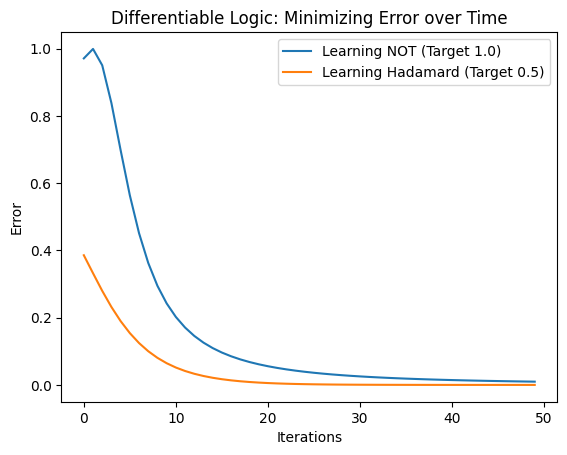

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuumBit:
    """
    Represents a bit not as '0' or '1', but as a coordinate on a
    unit circle (a normalized vector).
    """
    def __init__(self, state_0_prob=1.0):
        # We model the state as an angle (theta).
        # 0.0 radians = State 0 ([1, 0])
        # pi/2 radians = State 1 ([0, 1])
        self.theta = np.arccos(np.sqrt(state_0_prob))

    def get_state_vector(self):
        # Convert angle back to probability amplitudes
        # This is pure geometry.
        alpha = np.cos(self.theta) # Component for 0
        beta = np.sin(self.theta)  # Component for 1
        return np.array([alpha, beta])

    def measure(self):
        """
        The 'Collapse'.
        Samples the distribution to give a concrete 0 or 1.
        """
        vector = self.get_state_vector()
        prob_1 = vector[1] ** 2 # Born Rule (Probability = Amplitude^2)
        return 1 if np.random.rand() < prob_1 else 0

class DifferentiableGate:
    """
    Instead of a hardcoded logic gate, this is a parametric gate.
    It has a 'weight' (angle) that we can adjust smoothly.
    """
    def __init__(self, initial_rotation=0.0):
        self.param = initial_rotation # The "Angle" of operation

    def forward(self, bit):
        # Logic is just movement in the state space (Rotation)
        bit.theta += self.param
        return bit

    def backward(self, error, learning_rate=0.1):
        # Differentiable Programming: Adjust logic based on error
        self.param -= error * learning_rate

# --- SIMULATION ---

def run_learning_experiment(target_prob, iterations=50, label="Unknown"):
    print(f"\n--- Experiment: Teaching Gate to target Probability {target_prob} ({label}) ---")

    # Initialize with random logic (random rotation)
    my_gate = DifferentiableGate(initial_rotation=np.random.uniform(-1, 1))

    losses = []

    for i in range(iterations):
        # 1. Prepare fresh bit at State 0
        bit = ContinuumBit(state_0_prob=1.0)

        # 2. Process (Rotate)
        my_gate.forward(bit)

        # 3. Compute Current Probability of 1
        current_vector = bit.get_state_vector()
        current_prob_1 = current_vector[1] ** 2

        # 4. Compute Loss (Error)
        # We want the probability to match the target
        loss = current_prob_1 - target_prob
        losses.append(abs(loss))

        # 5. Learn (Backpropagate)
        # If probability is too high, rotate back. Too low, rotate forward.
        my_gate.backward(loss, learning_rate=0.2)

        if i % 10 == 0:
            print(f"Iter {i}: Angle = {np.degrees(my_gate.param):.2f}° | Prob = {current_prob_1:.4f}")

    print(f"Final Result: The gate learned a rotation of {np.degrees(my_gate.param):.2f}°")
    return losses

# 1. Teach it to be a NOT Gate (Turn 0 -> 1)
loss_not = run_learning_experiment(1.0, label="NOT Gate")

# 2. Teach it to be a HADAMARD Gate (Turn 0 -> 0.5 Superposition)
loss_hadamard = run_learning_experiment(0.5, label="Superposition/Hadamard")

# Visualize Learning
plt.plot(loss_not, label='Learning NOT (Target 1.0)')
plt.plot(loss_hadamard, label='Learning Hadamard (Target 0.5)')
plt.title("Differentiable Logic: Minimizing Error over Time")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.show()